In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
risk_group_mapping = pd.DataFrame(columns=['Risk_group', 'Decision', 'State_variable_VUL', 'State_variable_SES'])
risk_group_mapping['Risk_group'] = ['g0-00', 'g0-01', 'g0-10', 'g0-11', 'g1-00', 'g1-01', 'g1-10', 'g1-11']
risk_group_mapping['Decision'] = ['not-work', 'not-work', 'not-work', 'not-work',
                                  'work', 'work', 'work', 'work']
risk_group_mapping['State_variable_VUL'] = ['not-vulnerable', 'not-vulnerable', 'vulnerable', 'vulnerable',
                                            'not-vulnerable', 'not-vulnerable', 'vulnerable', 'vulnerable']
risk_group_mapping['State_variable_SES'] = ['high-SES', 'low-SES', 'high-SES', 'low-SES',
                                            'high-SES', 'low-SES', 'high-SES', 'low-SES']

In [7]:
### Baseline
def generate_results(runs, file, model):
    df_all = pd.DataFrame()
    for i in range(runs):
        df = pd.read_csv(file + 'model_' + str(model) + '_run_' + str(i+1) +'.csv')    
        df_all = pd.concat([df_all, df])
    return df_all

file_base = 'different_population/'

baseline = generate_results(10, file_base, 1)
baseline = baseline.groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
baseline.drop(columns = 'Unnamed: 0', inplace = True)

In [10]:
file_72 = 'Epi_only/'

In [11]:
df_72 = generate_results(10, file_72, 72)
df_72 = df_72.groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
df_72.drop(columns = 'Unnamed: 0', inplace = True)

df_75 = generate_results(10, file_72, 75)
df_75 = df_75.groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
df_75.drop(columns = 'Unnamed: 0', inplace = True)

In [13]:
df_results = pd.DataFrame(columns = ['time', 'model', '%I', '%work'])

I_75 = (df_75[df_75['infection_status'] == 'i'].groupby('time').sum(numeric_only=True)['count']/16000).values
I_72 = (df_72[df_72['infection_status'] == 'i'].groupby('time').sum(numeric_only=True)['count']/16000).values
I_baseline = (baseline[baseline['infection_status'] == 'i'].groupby('time').sum(numeric_only=True)['count']/16000).values

In [14]:
work_base = (baseline[baseline['risk_group'].str[:2] == 'g1'].groupby('time').sum(numeric_only=True)['count']/16000).values
x = np.arange(0, 366)

Text(0.5, 0, 'Time (days)')

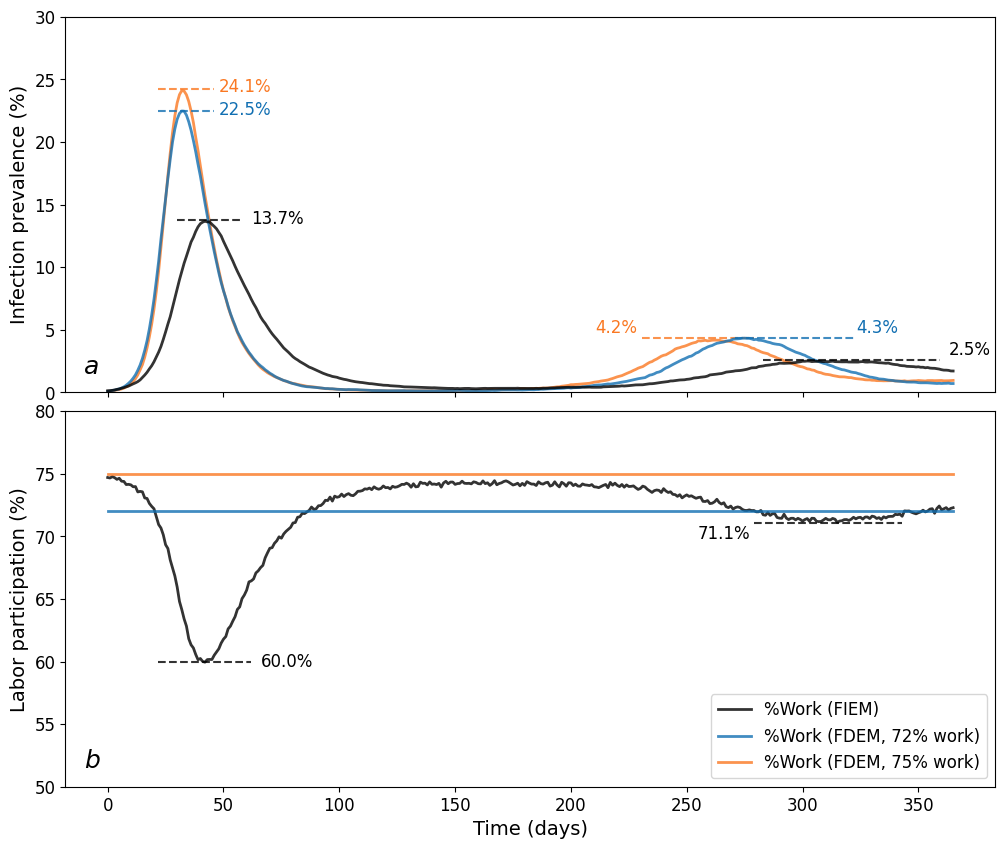

In [16]:
fig, axs = plt.subplots(2, figsize = (12,10), sharex=True)

color_base = 'black'
color_75 = '#FA7822'
color_72 = '#116FB2'

alpha = 0.8

axs[0].plot(x, I_75*100, color = color_75, label = r'I (FDEM, 75% work, $R_0 \approx 2.62$)', linewidth = 2, alpha = alpha)
axs[0].axhline(y=24.2, color=color_75, linestyle='--', alpha=alpha, xmin=0.1, xmax=0.16)
plt.text(0.165, 0.80, "24.1%", transform=axs[0].transAxes,  fontsize = 12, color = color_75)
axs[0].axhline(y=4.3, color=color_75, linestyle='--', alpha=alpha, xmin=0.62, xmax=0.74)
plt.text(0.57, 0.16, "4.2%", transform=axs[0].transAxes,  fontsize = 12, color = color_75)

axs[0].plot(x, I_72*100, color = color_72, label = r'I (FDEM, 72% work, $R_0 \approx 2.52$)', linewidth = 2, alpha = alpha)
axs[0].axhline(y=22.5, color=color_72, linestyle='--', alpha=alpha, xmin=0.1, xmax=0.16)
plt.text(0.165, 0.74, "22.5%", transform=axs[0].transAxes,  fontsize = 12, color = color_72)
axs[0].axhline(y=4.35, color=color_72, linestyle='--', alpha=alpha, xmin=0.72, xmax=0.85)
plt.text(0.85, 0.16, "4.3%", transform=axs[0].transAxes,  fontsize = 12, color = color_72)

axs[0].plot(x, I_baseline*100, color = color_base, label = r'I (FIEM, $R_0 \approx$ 2.05)', linewidth = 2, alpha = alpha)
axs[0].axhline(y=13.8, color=color_base, linestyle='--', alpha=alpha, xmin=0.12, xmax=0.19)
plt.text(0.2, 0.45, "13.7%", transform=axs[0].transAxes,  fontsize = 12, color = color_base)
axs[0].axhline(y=2.6, color=color_base, linestyle='--', alpha=alpha, xmin=0.75, xmax=0.94)
plt.text(0.95, 0.10, "2.5%", transform=axs[0].transAxes,  fontsize = 12, color = color_base)

# axs[0].legend(fontsize = 12)

axs[1].plot(x, work_base*100, color = color_base, label = r'%Work (FIEM)', linewidth = 2, alpha = alpha)
axs[1].axhline(y=60, color=color_base, linestyle='--', alpha=alpha, xmin=0.1, xmax=0.2)
plt.text(0.21, 0.32, "60.0%", transform=axs[1].transAxes,  fontsize = 12, color = color_base)

axs[1].axhline(y=71.1, color=color_base, linestyle='--', alpha=alpha, xmin=0.74, xmax=0.9)
plt.text(0.68, 0.66, "71.1%", transform=axs[1].transAxes,  fontsize = 12, color = color_base)


axs[1].plot(x, [72]*366, color = color_72, label = r'%Work (FDEM, 72% work)', linewidth = 2, alpha = alpha)

axs[1].plot(x, [75]*366, color = color_75, label = r'%Work (FDEM, 75% work)', linewidth = 2, alpha = alpha)

axs[1].legend(fontsize = 12)
plt.subplots_adjust(wspace=0.1, hspace=0.05)

# axs[0].set_yticklabels(axs[0].get_yticks(), weight='bold', size=12)
# axs[1].set_yticklabels(axs[1].get_yticks(), weight='bold', size=12)
# axs[1].set_xticklabels(axs[1].get_xticks(), weight='bold', size=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

axs[0].set_ylabel('Infection prevalence (%)', fontsize= 14) 
axs[1].set_ylabel('Labor participation (%)', fontsize= 14)

axs[0].set_ylim([0, 30])
axs[1].set_ylim([50, 80])


plt.text(0.02, 0.05, "a", transform=axs[0].transAxes, fontstyle = 'italic', fontsize = 18)
plt.text(0.02, 0.05, "b", transform=axs[1].transAxes, fontstyle = 'italic', fontsize = 18)

axs[1].set_xlabel('Time (days)', fontsize = 14)




In [17]:
df_cum = pd.DataFrame(columns = ['time', 'model', 'Cum_I', 'Average_work'])
data = []

for model in ['base', '72', '75']:
    for time in [100, 200, 300, 365]:
        if model == 'base':
            I = I_baseline[:time].sum()
            work = work_base[:time].mean()*100
            label = 'FIEM'
        elif model == '72':
            I = I_72[:time].sum()
            work = 72
            label = 'FDEM, 72% work'
        else:
            I = I_75[:time].sum()
            work = 75
            label = 'FDEM, 75% work'
        data.append({'time': time, 'model': model, 'Cum_I': I, 'Average_work': work, 'label': label})

# Convert the list of dictionaries to a DataFrame
df_cum = pd.DataFrame(data)


In [18]:
df_cum['Average_work'] = round(df_cum['Average_work'], 1)

In [19]:
df_cum

,time,model,Cum_I,Average_work,label
0,100,base,5.505620,68.6,FIEM
1,200,base,5.953918,71.3,FIEM
2,300,base,7.151966,71.9,FIEM
3,365,base,8.615747,71.8,FIEM
4,100,72,6.173746,72.0,"FDEM, 72% work"
5,200,72,6.348821,72.0,"FDEM, 72% work"
6,300,72,8.798812,72.0,"FDEM, 72% work"
7,365,72,9.709964,72.0,"FDEM, 72% work"
8,100,75,6.283367,75.0,"FDEM, 75% work"
9,200,75,6.490348,75.0,"FDEM, 75% work"


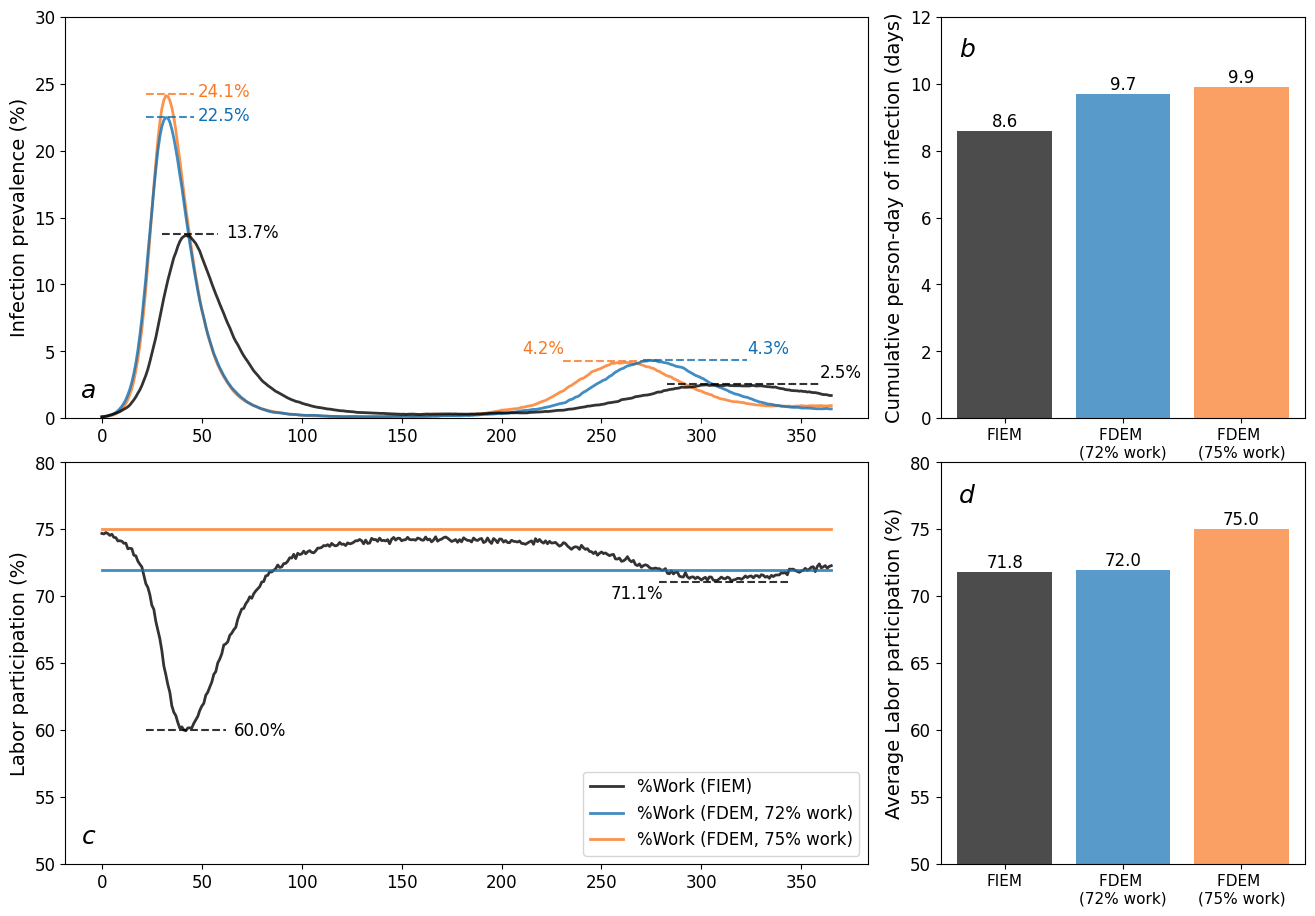

In [20]:
# Create figure
fig = plt.figure(figsize=(16, 11))

# Define GridSpec: 2 rows, 6 columns
# This approach uses an invisible middle column to balance the width of plots
gs = gridspec.GridSpec(2, 6, wspace=0.5, hspace=0.11)
ax0 = fig.add_subplot(gs[0, :4]) 
ax1 = fig.add_subplot(gs[0, 4:6]) 
ax2 = fig.add_subplot(gs[1, :4]) 
ax3 = fig.add_subplot(gs[1, 4:6]) 

color_base = 'black'
color_75 = '#FA7822'
color_72 = '#116FB2'

alpha = 0.8

ax0.plot(x, I_75*100, color = color_75, label = r'I (FDEM, 75% work, $R_0 \approx 2.62$)', linewidth = 2, alpha = alpha)
ax0.axhline(y=24.2, color=color_75, linestyle='--', alpha=alpha, xmin=0.1, xmax=0.16)
plt.text(0.165, 0.80, "24.1%", transform=ax0.transAxes,  fontsize = 12, color = color_75)
ax0.axhline(y=4.3, color=color_75, linestyle='--', alpha=alpha, xmin=0.62, xmax=0.74)
plt.text(0.57, 0.16, "4.2%", transform=ax0.transAxes,  fontsize = 12, color = color_75)

ax0.plot(x, I_72*100, color = color_72, label = r'I (FDEM, 72% work, $R_0 \approx 2.52$)', linewidth = 2, alpha = alpha)
ax0.axhline(y=22.5, color=color_72, linestyle='--', alpha=alpha, xmin=0.1, xmax=0.16)
plt.text(0.165, 0.74, "22.5%", transform=ax0.transAxes,  fontsize = 12, color = color_72)
ax0.axhline(y=4.35, color=color_72, linestyle='--', alpha=alpha, xmin=0.72, xmax=0.85)
plt.text(0.85, 0.16, "4.3%", transform=ax0.transAxes,  fontsize = 12, color = color_72)

ax0.plot(x, I_baseline*100, color = color_base, label = r'I (FIEM, $R_0 \approx$ 2.05)', linewidth = 2, alpha = alpha)
ax0.axhline(y=13.8, color=color_base, linestyle='--', alpha=alpha, xmin=0.12, xmax=0.19)
plt.text(0.2, 0.45, "13.7%", transform=ax0.transAxes,  fontsize = 12, color = color_base)
ax0.axhline(y=2.6, color=color_base, linestyle='--', alpha=alpha, xmin=0.75, xmax=0.94)
plt.text(0.94, 0.10, "2.5%", transform=ax0.transAxes,  fontsize = 12, color = color_base)

# ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


ax2.plot(x, work_base*100, color = color_base, label = r'%Work (FIEM)', linewidth = 2, alpha = alpha)
ax2.axhline(y=60, color=color_base, linestyle='--', alpha=alpha, xmin=0.1, xmax=0.2)
plt.text(0.21, 0.32, "60.0%", transform=ax2.transAxes,  fontsize = 12, color = color_base)

ax2.axhline(y=71.1, color=color_base, linestyle='--', alpha=alpha, xmin=0.74, xmax=0.9)
plt.text(0.68, 0.66, "71.1%", transform=ax2.transAxes,  fontsize = 12, color = color_base)


ax2.plot(x, [72]*366, color = color_72, label = r'%Work (FDEM, 72% work)', linewidth = 2, alpha = alpha)

ax2.plot(x, [75]*366, color = color_75, label = r'%Work (FDEM, 75% work)', linewidth = 2, alpha = alpha)

ax2.legend(fontsize = 12, loc = 'lower right')

ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)
ax0.tick_params(axis='x', labelsize=12)

ax0.set_ylabel('Infection prevalence (%)', fontsize= 14) 
ax2.set_ylabel('Labor participation (%)', fontsize= 14)

ax0.set_ylim([0, 30])
ax2.set_ylim([50, 80])


plt.text(0.02, 0.05, "a", transform=ax0.transAxes, fontstyle = 'italic', fontsize = 18)
plt.text(0.02, 0.05, "c", transform=ax2.transAxes, fontstyle = 'italic', fontsize = 18)

axs[1].set_xlabel('Time (days)', fontsize = 14)


# categories = ['FIEM (100 days)', 'FDEM (%72 work, 100 days)', 'FDEM (%75 work, 100 days)', 
#               'FIEM (200 days)', 'FDEM (%72 work, 200 days)', 'FDEM (%75 work, 200 days)']
# values1 = [5.5, 6.2, 6.3, 6.0, 6.3, 6.5]
# values2 = [5, 15, 10, 20]
# colors = [color_base, color_72, color_75,
#           color_base, color_72, color_75]

categories = ['FIEM', 'FDEM \n(72% work)', 'FDEM \n(75% work)']
values1 = [8.6, 9.7, 9.9]
values2 = [71.8, 72, 75]
colors = [color_base, color_72, color_75]

# Add bar plot to ax2
bars = ax1.bar(categories, values1, color=colors, alpha=0.7)
# ax1.set_xlabel('Categories', fontsize=12)
ax1.set_ylabel('Cumulative person-day of infection (days)', fontsize=14)
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.set_ylim([0, 12])
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=12)

bars2 = ax3.bar(categories, values2, color=colors, alpha=0.7)
# ax1.set_xlabel('Categories', fontsize=12)
ax3.set_ylabel('Average Labor participation (%)', fontsize=14)
# ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax3.set_ylim([50, 80])

for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=12)
ax3.tick_params(axis='x', labelsize=11)
ax1.tick_params(axis='x', labelsize=11)

plt.text(0.05, 0.9, "b", transform=ax1.transAxes, fontstyle = 'italic', fontsize = 18)
plt.text(0.05, 0.9, "d", transform=ax3.transAxes, fontstyle = 'italic', fontsize = 18)

ax1.tick_params(axis='y', labelsize=12)

ax3.tick_params(axis='y', labelsize=12)
